# Malaria Cell Image Classification

The dataset contains two folders; parasitized amd uninfected and has a total of 27,558 images.

Acknowledgements : This dataset is taken from the official NIH website.

In [1]:
#Importing the relevant libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [2]:
#Loading the dataset
data_dir = 'C:\\Users\\Admin\\Downloads\\cell_images'

In [3]:
# The dataset has two folders which is the train and test. The model will be trained on the images in the train folder and will
#later be tested using the images in the test folder.
os.listdir(data_dir)

['test', 'train']

In [4]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [5]:
test_path

'C:\\Users\\Admin\\Downloads\\cell_images\\test\\'

In [6]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [9]:
para_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [10]:
para_cell

'C:\\Users\\Admin\\Downloads\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
imread(para_cell).shape

(148, 142, 3)

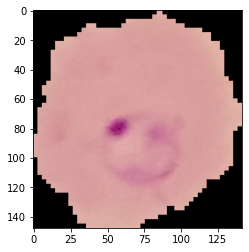

In [12]:
plt.imshow(imread(para_cell))

In [13]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [14]:
uninfected_cell = train_path + 'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [15]:
uninfected_cell

'C:\\Users\\Admin\\Downloads\\cell_images\\train\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [16]:
uninfected_cell = imread(uninfected_cell)

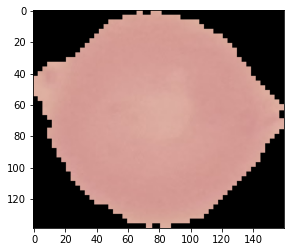

In [17]:
plt.imshow(uninfected_cell)

##### Checking how many images are there

In [18]:
len(os.listdir(test_path+'parasitized'))

1300

In [19]:
len(os.listdir(test_path+'uninfected'))

1300

In [20]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [21]:
dim1

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


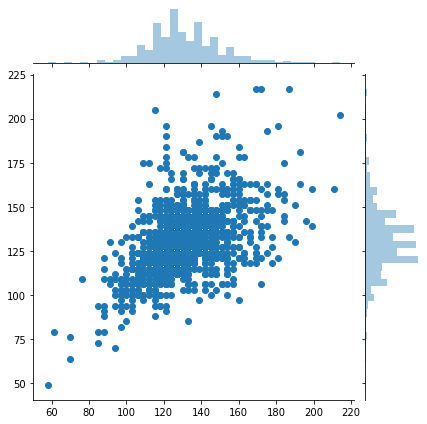

In [22]:
sns.jointplot(dim1,dim2)

In [23]:
np.mean(dim1)

130.92538461538462

In [24]:
np.mean(dim2)

130.75

In [25]:
image_shape = (130,130,3)

# Preparing the data for the model

In [26]:
#ImageDataGenerator generates more images so that the model is robust to images that are not present in the dataset.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

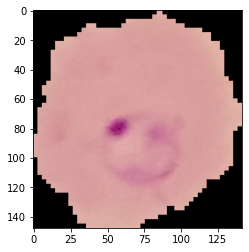

In [28]:
para_img = imread(para_cell)
plt.imshow(para_img)

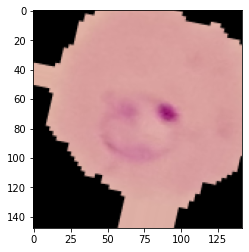

In [29]:
plt.imshow(image_gen.random_transform(para_img))

#### Generating manipulated images from a directory

In [30]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [31]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Training and Building the Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [33]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
#Dropout layers are added so as to prevent overfitting by randomly turning off neurons. Here,50% of the neurons are turned off.

#Sigmoid function is used in the last layer as it is a binary classification
model.add(Dense(1,activation='sigmoid'))

#binary_crossentropy is used as it is a binary classification problem.
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [37]:
batch_size = 16

In [38]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [39]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                              shuffle=False)

Found 2600 images belonging to 2 classes.


In [40]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [41]:
results = model.fit_generator(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1560/1560 [==============================] - 1258s 807ms/step - loss: 0.9298 - accuracy: 0.5666 - val_loss: 0.6781 - val_accuracy: 0.6012
Epoch 2/20
1560/1560 [==============================] - 735s 471ms/step - loss: 0.6766 - accuracy: 0.5795 - val_loss: 0.6808 - val_accuracy: 0.5627
Epoch 3/20
1560/1560 [==============================] - 727s 466ms/step - loss: 0.6750 - accuracy: 0.5882 - val_loss: 0.6657 - val_accuracy: 0.6019
Epoch 4/20
1560/1560 [==============================] - 724s 464ms/step - loss: 0.6714 - accuracy: 0.5955 - val_loss: 0.6681 - val_accuracy: 0.6062
Epoch 5/20
1560/1560 [==============================] - 737s 472ms/step - loss: 0.4114 - accuracy: 0.7986 - val_loss: 0.1948 - val_accuracy: 0.9323
Epoch 6/20
1560/1560 [==============================] - 725s 465ms/step - loss: 0.1910 - accuracy: 0.9407 - val_loss: 0.1784 - val_accuracy: 0.9408
Epoch 7/20
1560/1560 [=============

# Evaluating the Model

In [42]:
losses = pd.DataFrame(model.history.history)

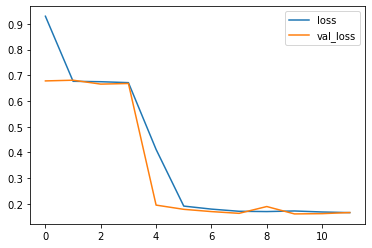

In [43]:
losses[['loss','val_loss']].plot()

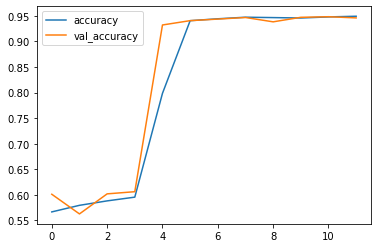

In [45]:
losses[['accuracy','val_accuracy']].plot()

In [46]:
model.evaluate_generator(test_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.16503725945949554, 0.944615364074707]

In [47]:
from tensorflow.keras.preprocessing import image

In [48]:
pred_probabilities = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [49]:
pred_probabilities

array([[6.2257604e-05],
       [1.5902519e-04],
       [8.9819878e-05],
       ...,
       [9.5422220e-01],
       [9.8510194e-01],
       [9.4228429e-01]], dtype=float32)

In [50]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [51]:
predictions = pred_probabilities > 0.5

In [52]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(classification_report(test_image_gen.classes,predictions))
print(confusion_matrix(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600

[[1215   85]
 [  50 1250]]


# Making Predictions

In [87]:
os.listdir(test_path+'\\parasitized')[1]

'C100P61ThinF_IMG_20150918_145422_cell_165.png'

In [88]:
infected_im = test_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_145422_cell_165.png'

In [89]:
my_image = image.load_img(infected_im,target_size=image_shape)

In [91]:
type(my_image)

PIL.Image.Image

In [92]:
my_image = image.img_to_array(my_image)

In [93]:
type(my_image)

numpy.ndarray

In [94]:
my_image.shape

(130, 130, 3)

In [95]:
my_image = np.expand_dims(my_image, axis=0)

In [96]:
my_image.shape

(1, 130, 130, 3)

In [99]:
a = np.argmax(model.predict(my_image))

In [101]:
if(a==1):
    print("Uninfected")
else:
    print("Parasitized")

Parasitized


The model predicts that the image is a Malaria infected cell which is correct.